In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [3]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [4]:
#read the file
df = pd.read_csv('data/WMT.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,76.059998,76.250000,75.650002,76.080002,67.061386,4959300
1,2014-09-30,76.040001,76.720001,75.769997,76.470001,67.405151,5640700
2,2014-10-01,76.510002,76.860001,75.910004,76.120003,67.096642,6524900
3,2014-10-02,76.209999,76.910004,75.959999,76.230003,67.193604,4921200
4,2014-10-03,76.570000,77.480003,76.529999,77.320000,68.154404,5819700


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null object
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Adj Close    1258 non-null float64
Volume       1258 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2019-09-20,117.349998,117.639999,116.800003,116.980003,116.980003,11332400
1254,2019-09-23,116.610001,118.410004,116.559998,117.620003,117.620003,5162500
1255,2019-09-24,118.250000,119.860001,118.010002,118.400002,118.400002,7273100
1256,2019-09-25,118.470001,118.720001,117.809998,118.470001,118.470001,4613600
1257,2019-09-26,118.800003,119.550003,118.190002,118.300003,118.300003,3986900


In [8]:
df["Date"]=pd.to_datetime(df.Date,format='%Y-%m-%d')

In [9]:
df.index=df['Date']

C:\Users\Ujwala\Anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


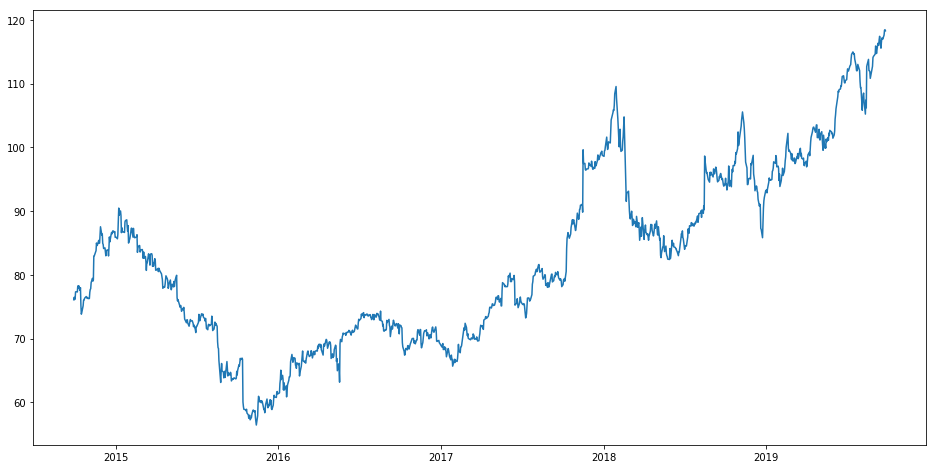

In [10]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [11]:
data=df.sort_index(ascending=True,axis=0)
new_data=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

In [12]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [13]:
train = new_data[:1073]
test = new_data[1073:]

In [14]:
print('\n Shape of training set:')
print(train.shape)


 Shape of training set:
(1073, 2)


In [15]:
# shapes of validation set
print('\n Shape of validation set:')
print(test.shape)


 Shape of validation set:
(185, 2)


In [16]:
preds = []
for i in range(0,test.shape[0]):
    a = train['Close'][len(train)-185+i:].sum() + sum(preds)
    b = a/185
    preds.append(b)

In [17]:
preds

[91.19691875135133,
 91.2225777878451,
 91.25129440291457,
 91.28276085914652,
 91.31120823135814,
 91.33537694612225,
 91.35394654042562,
 91.374400305509,
 91.39323490716039,
 91.41709021476667,
 91.44583125376542,
 91.472403320002,
 91.49565956497497,
 91.51487933559645,
 91.53771651578887,
 91.554352826685,
 91.57675471223466,
 91.60506151608458,
 91.63411588644179,
 91.65630030204419,
 91.68973975773089,
 91.72190052398891,
 91.76872161871317,
 91.81779577881431,
 91.86340550194306,
 91.90380229384546,
 91.94371475489328,
 91.97514025627108,
 92.01560048468335,
 92.06087400622218,
 92.10168953058013,
 92.14888783615083,
 92.19828721904894,
 92.2488185121249,
 92.30173105002827,
 92.35525390975813,
 92.39976877954061,
 92.45306482159218,
 92.50421653414132,
 92.54250960729885,
 92.5853339673383,
 92.62871416175633,
 92.67022074100908,
 92.71514084771724,
 92.76062807932652,
 92.80744229597151,
 92.8545636273011,
 92.90356126312435,
 92.95331025914123,
 93.00711193621767,
 93.057907

In [18]:
# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(test['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
13.183023079596383


C:\Users\Ujwala\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ujwala\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


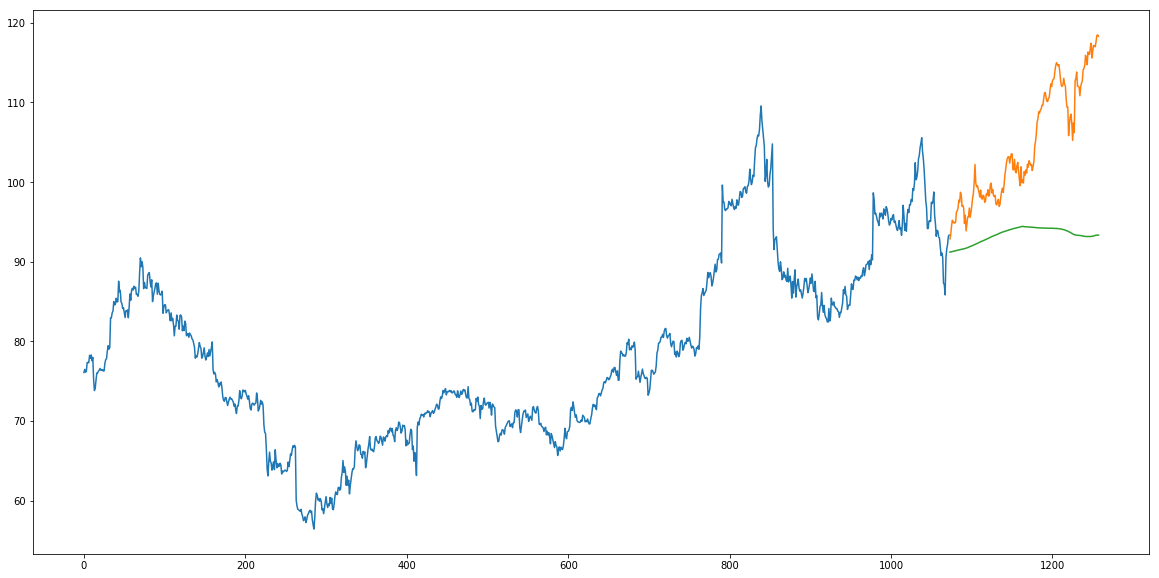

In [19]:
#plot
test['Predictions'] = 0
test['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])

## Linear Regression 

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
new_data['Epoch'] = pd.to_datetime(new_data['Date']).values.astype(np.int64)

In [22]:
new_data.head()

,Date,Close,Epoch
0,2014-09-29 00:00:00,76.08,1411948800000000000
1,2014-09-30 00:00:00,76.47,1412035200000000000
2,2014-10-01 00:00:00,76.12,1412121600000000000
3,2014-10-02 00:00:00,76.23,1412208000000000000
4,2014-10-03 00:00:00,77.32,1412294400000000000


In [23]:
stock_prices_to_learn = pd.DataFrame(index=range(0,len(new_data)),columns=['Date', 'Close'])

In [24]:
stock_prices_to_learn['Date'] = new_data['Epoch']
stock_prices_to_learn['Close'] = new_data['Close']

In [25]:
model = LinearRegression()

train_stock_prices = stock_prices_to_learn[:1073]
test_stock_prices = stock_prices_to_learn[1073:]

print(train_stock_prices[:10])

                  Date  Close
0  1411948800000000000  76.08
1  1412035200000000000  76.47
2  1412121600000000000  76.12
3  1412208000000000000  76.23
4  1412294400000000000  77.32
5  1412553600000000000  77.35
6  1412640000000000000   77.3
7  1412726400000000000  78.24
8  1412812800000000000  77.86
9  1412899200000000000  78.29


In [26]:
x_train = train_stock_prices[['Date']].copy()  
y_train = train_stock_prices[['Close']].copy()

x_test = test_stock_prices[['Date']].copy()  
y_test = test_stock_prices[['Close']].copy()

model.fit(x_train, y_train)

predictions = model.predict(x_test)

rms = np.sqrt(np.mean(np.power((np.array(y_test) - np.array(predictions)),2)))




# predictions_to_plot = pd.DataFrame(index=range(0,len(x_test)),columns=['Date', 'Close'])

print(rms)

14.513271434158154


C:\Users\Ujwala\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


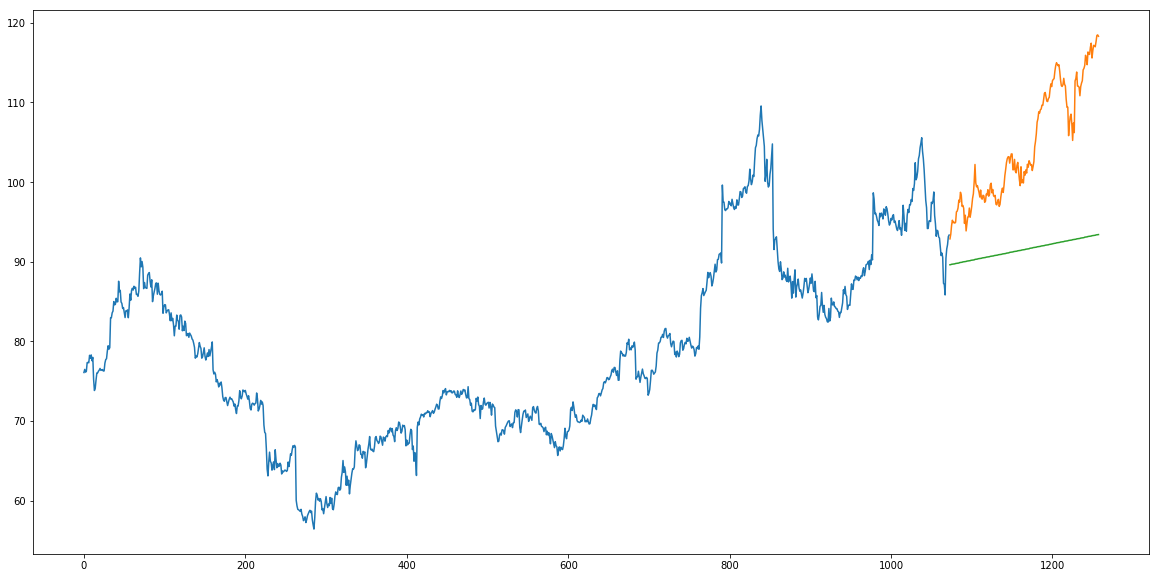

In [27]:
#plot
test_stock_prices['Predictions'] = predictions
plt.plot(train_stock_prices[['Close']])
plt.plot(test_stock_prices[['Close', 'Predictions']])

### LSTM Model
LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. 
The reason they work so well is because LSTM is able to store past information that is important,
and forget the information that is not

In [28]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [30]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]


In [31]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [32]:
dataset = new_data.values
dataset[:10]

array([[76.08000200000001],
       [76.470001],
       [76.120003],
       [76.230003],
       [77.32],
       [77.349998],
       [77.300003],
       [78.239998],
       [77.860001],
       [78.290001]], dtype=object)

In [33]:
train = dataset[0:1073,:]
test = dataset[1073:,:]

In [34]:
train

array([[76.08000200000001],
       [76.470001],
       [76.120003],
       ...,
       [92.129997],
       [93.150002],
       [93.339996]], dtype=object)

In [35]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

C:\Users\Ujwala\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.31684131],
       [0.32312654],
       [0.31748596],
       ...,
       [0.99887189],
       [1.        ],
       [0.99726031]])

In [36]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [37]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
 - 60s - loss: 0.0025


In [38]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)


In [49]:
print(len(new_data) - len(valid) - 60)
print(inputs.shape[0])

1013
245


In [39]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [42]:
X_test

array([[[0.59452052],
        [0.61676071],
        [0.65527803],
        ...,
        [0.57550358],
        [0.59194202],
        [0.59500397]],

       [[0.61676071],
        [0.65527803],
        [0.63400487],
        ...,
        [0.59194202],
        [0.59500397],
        [0.58726835]],

       [[0.65527803],
        [0.63400487],
        [0.6043513 ],
        ...,
        [0.59500397],
        [0.58726835],
        [0.59661567]],

       ...,

       [[0.87139399],
        [0.87348916],
        [0.88928279],
        ...,
        [0.97808219],
        [0.97598714],
        [0.9863014 ]],

       [[0.87348916],
        [0.88928279],
        [0.90088637],
        ...,
        [0.97598714],
        [0.9863014 ],
        [0.99887189]],

       [[0.88928279],
        [0.90088637],
        [0.89540697],
        ...,
        [0.9863014 ],
        [0.99887189],
        [1.        ]]])

In [40]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

2.6690938601648186

C:\Users\Ujwala\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


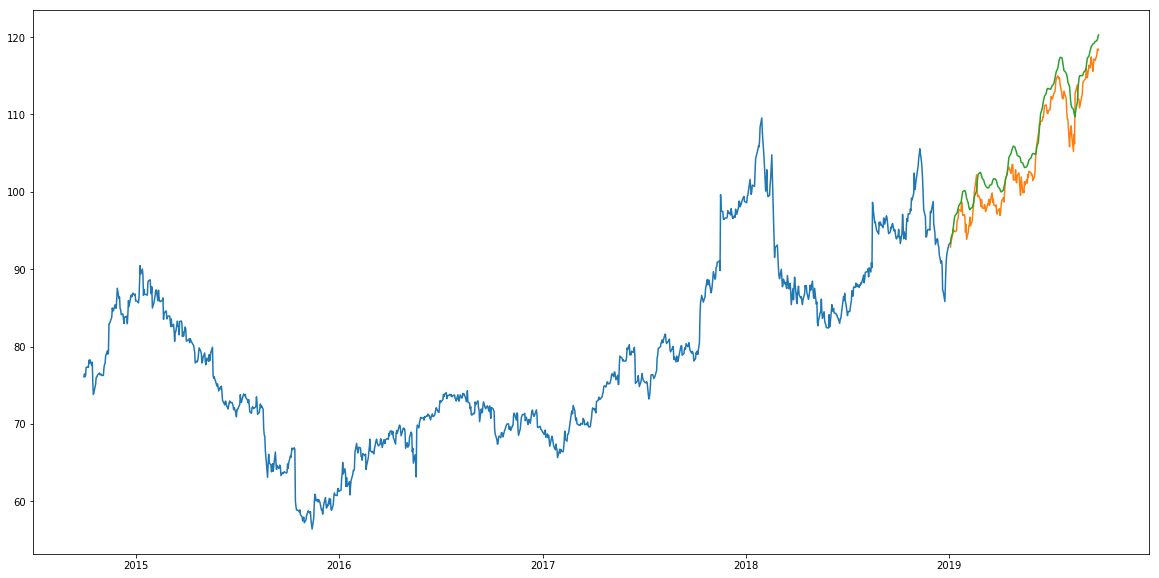

In [41]:
#for plotting
train = new_data[:1073]
valid = new_data[1073:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])